# <center>Health Indicators and their relationshp to having Diabetes</center>
<center>By: Casey Cruz</center> 

---

## Introduction
> Diabetes is a chronic medical condition that affects how the body creates energy from food. The food consumed is broken down into sugar which is released into the bloodstream. When this happens,  blood sugar levels go up, but the pancreas releases insulin to stabilize it. If a person has diabetes, their body cannot regulate blood sugar levels through the use of insulin as well as someone without diabetes. This results in too much blood sugar remaining in the bloodstream and can cause serious health concerns.
  
> In the US there are around 38 million adults that have diabetes. It is the 8th leading cause of death in the US and the number 1 cause of kidney failure, lower-limb amputation, and adult blindness. The number of adults that have been diagnosed with diabetes has doubled in the last twenty years which is a major problem. For this project, the dataset that will be used is from the Behavioral Risk Factor Surveillance System (BRFSS) which collects data on health-related risk behaviors and chronic health conditions. The specific dataset that will be analyzed contains data on whether a person has no diabetes or has diabetes/prediabetes and health indicators that they have or do not have. Examples of the indicators are high blood pressure and high cholestrol. This data can be used to understand the health indicators that relate to someone having diabetes. With that, information on general preventative measures can be identified and released to the public to show them which things are important to reduce their chances of having diabetes.

## How to use the Data Science Pipeline to Analyze Data
> When working with data, there are four main aspects that are used. They are __<font color = green>data collection</font>__, __<font color = green>data storage</font>__, __<font color = green>data analyis</font>__, and __<font color = green>data visualization</font>__. Data Collection is the process of gathering raw information from various sources. This can be done through web scraping. Data Storage is organizing, cleaning, and storing the data in a structured format that allows for easy retrieval and analysis. Data Analysis is where stored data is transformed and manipulated to extract meaningful insights. Data Presentation is communicating the results of data analysis in a clear and understandable manner. This often done through visualizations.

---

### Objective
>In this project the overall objective will be to create a classification algorithm to predict if their is a presense of diabetes based on health indicators. Python will be the programming language used.

---

## <font color = green>Data Collection</font>
> The data that will be analysing has already been collected. However, it is important to understand data collection since it is the first step in the data science pipeline so an example will be run through.

>Data collection is the process of gathering raw information from sources and can perform this by web scraping. Web scraping is the process of extracting information or data from websites. In the example well will be extracting data from https://www.cnn.com.

>Here we can see the steps of web scraping. The first step is to make a request to the site to access and then parse the HTML code of the site. We extract the article references and then request and parse their HTML code with BeautifulSoup. The article title gets extracted and printed. The data collected can then be saved, processed, or used for analysis. <font color = red>Follow along with comments in the code!</font>

In [111]:
#Import necessary libraries
import requests #for making requests for a websites data
import re #regular expressions, a way to parse HTML
from bs4 import BeautifulSoup #for web scraping

#Retrieve HTML text from the initial URL
initialSite = "https://www.cnn.com"
getHTML = requests.get(initialSite)
siteHTML = getHTML.text

#Find all article links from the HTML
allArticles = re.findall(r'<a href="(/[^"]+)"', siteHTML)

#Filter out video links and duplicates & keep the top articles
topArticles = []
for newArticle in allArticles:
    if newArticle not in topArticles and "video" not in newArticle:
        topArticles.append(newArticle)
        
topArticles = topArticles[:5]
    
#Initialize lists to store article titles and word counts
titles = [] 
       
#Iterate through the chosen article links
for articleLink in topArticles:
    if "live-news" in articleLink:
        articleURL = f"{initialSite}/{articleLink}"
    else:
        articleURL = f"{initialSite}{articleLink}"

    #Retrieve HTML text for the article
    txt = requests.get(articleURL)
    articleHTML = txt.text
    
    #Check if access is denied
    if "Access to this page has been denied" in articleHTML: continue  # Skip this article
    
    # Find the title of the article & print
    soup = BeautifulSoup(articleHTML, 'html.parser')  # Initialize BeautifulSoup for web scraping
    for title in soup.find('title'):  # Find title
        print("-", title.get_text())

- Live updates: Israel-Hamas war intensifies, Gaza humanitarian crisis worsens | CNN
- Geminid meteor shower set to peak this week | CNN
- Tesla recalls 2 million vehicles to limit use of Autopilot feature after nearly 1,000 crashes | CNN Business
- Manchester United’s disastrous season plumbs new depths following meek Champions League exit | CNN


#### Data Ethics
> Web scraping can be a powerful tool but should be used responsibly and ethically. Some website owners may include terms of service that prohibit or restrict scraping, and other websites may employ measures to prevent or limit access. It is crucial to be aware of these legal considerations when performing web scraping and to comply with legal guidelines, be transparent, and obtain informed consent. Additionally, there are many ethical aspects to consider. Given that the integrity and reliability of data are so important, when data collection is flawed or conducted poorly, the resulting dataset may not accurately reflect the targeted characteristics of the data. Examples of these flaws include incomplete data and skewed survey questions, which can introduce biases during data collection. These biases may lead to misinterpretation or the reinforcement of existing biases. That is why it is important to consider data ethics when collecting data and to avoid this by being fair in data collection and minimizing biases.

## <font color = green>Data Storage</font>
> The next step in the data science pipeline is data storage. That involves organizing, cleaning, and storing the data in a structured format. When we store the data there are four main irregularities we look for. They are missing data, unecessary data, irrelevant data, inconsistent data. Missing data refers to the absent values. This can be resolved by inputting a value or removing the data. Unnecessary data refers non-essential information for the goals of an analysis. This can be resolved by excluding certain data. Irrelevant data refers to information that has no meaningful impact on the analysis. This can be resolved by fulling removing data. Inconsistent data refers to information that does not follow a uniform format across the dataset. That can be because of certain characters, numbers, or HTML-specific code and can be resolved through parsing. The pandas library has many built in tools that can be used to remove  irregularities and they will be used in the example. 

>Our data set has already been put together in a readable fashion so there is no missing, irrelevant or inconsistent data included. It does have unecessary data that will need to be removed. First we need to start with reading our data which is a csv file. <font color = red>Follow along with comments in the code!</font>

In [112]:
#Import the pandas library for data manipulation and analysis
import pandas as pd

#File path to the CSV file
csvfile = 'diabetes_binary_health_indicators_BRFSS2021.csv'

#Read the CSV file into a pandas DataFrame
df = pd.read_csv(csvfile)

#Print the column titles
column_titles = df.columns
print(column_titles)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


### Data Cleaning
>The next step in data storage is cleaning and modyfiyng the data to be easily readable/manipulated. When this is done it is important to keep in mind the objectives so the most beneficial information to the analysis is extracted. This analysis will create a classification algorithm to predict if their is a presense of diabetes based on certain health indicators. The variables we want to analyze relate to mainly physical health conditons so certain categories can be dropped from the data frame. <br><br>We are going to remove 'CholCheck', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', and 'Income'. These are the unnecessary data.

In [113]:
#column names intended to be remove from the DataFrame
columnsToRemove = ['CholCheck', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age','Education', 'Income']

#Remove specified columns
df.drop(columns=columnsToRemove, errors='ignore', inplace=True)

#Edit name for clarity
df.rename(columns={'Diabetes_binary': 'PresenceDiabetes'}, inplace=True)

#print new structure
print(df.head())

   PresenceDiabetes  HighBP  HighChol   BMI  Smoker  Stroke  \
0               0.0       0       1.0  15.0     1.0     0.0   
1               1.0       1       0.0  28.0     0.0     0.0   
2               1.0       1       1.0  33.0     0.0     0.0   
3               1.0       0       1.0  29.0     0.0     1.0   
4               0.0       0       0.0  24.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  
0                   0.0             0       1        1  
1                   1.0             0       1        0  
2                   0.0             1       1        1  
3                   1.0             1       1        1  
4                   0.0             0       0        0  


> Our dataset includes the following variables: Presence of Diabetes, High Blood Pressure (HighBP), High Cholesterol (HighChol), Body Mass Index (BMI), Smoking status (Smoker), History of Stroke, History of Heart Disease or Heart Attack, Engagement in Physical Activity (PhysActivity), Consumption of Fruits, and Consumption of Vegetables. All variables, except for BMI, are binary, where 0 signifies the absence of the health indicator, and 1 signifies its presence. For BMI, the scale categorizes individuals as: underweight (<18.5), normal weight (18.5–24.9), overweight (25–29.9), and obesity (30 or greater). Now the data has been stored in a way that we can manipulate it. 

## <font color = green>Data Analysis</font>
> The next step in the data science pipeline is data analysis. This is where stored data is transformed and manipulated to extract meaningful insights. The objective is to create a classification algorithm to predict if their is a presense of diabetes based on health indicators. 

>Before the classification is ran, it is beneficial to look at the distribution of data. This can help identify if there is an imbalance in the distribution which can affect the performance of the classification algorithms, as the model may be biased towards the majority class. It gives you the range and scale of features which can be crucial. Examining the distribution helps in identifying potential outliers or skewed features that might need preprocessing. Also it can help decide which classification algorithms will be most suitable. <font color = red>Follow along with comments in the code!</font>

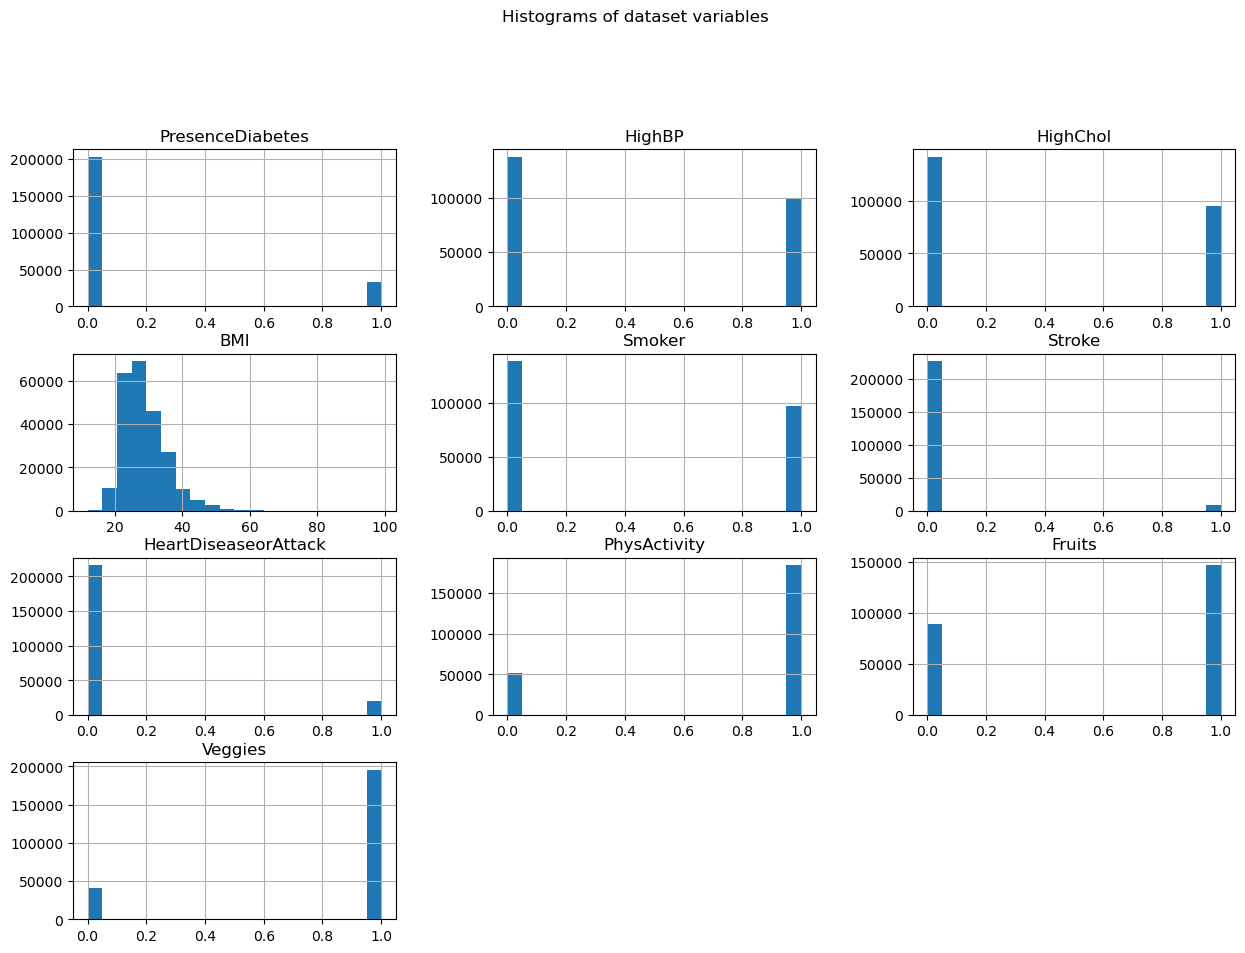

In [114]:
#The matplotlib library is used to create plots and visualizations
import matplotlib.pyplot as plt

#Display histograms for variables to show distribution
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns #selects numerical columns
df[numerical_columns].hist(bins=20, figsize=(15, 10)) #creates histograms
plt.suptitle('Histograms of dataset variables', y=1.02)
plt.show() #Display the histograms

> When looking at these results it is clear our dataset is imbalanced. One of the most notable is the how imblanced the PresenceDiabetes is. As previously mentioned with the imbalance the model may be biased towards the majority class which is 0, indicating the absense of diabetes. 
### Classification
>Now the classification can be ran. In the classification, data is preprocessed so the features (health indicators) and the target variable are defined (Presense Diabetes). The data is split dataset into training and testing sets to train and the evalute the model. Then the classification tool that will be used is the the Random Forest Classifier. It is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputs the class that is the mode of the classes of the individual trees. The classifier is then trained and used to make predictions on the test set. The model is evaluted by calculating the accuracy of the predictions.

In [115]:
#Import necessary libraries
from sklearn.model_selection import train_test_split #to split the dataset into training and testing sets
from sklearn.ensemble import RandomForestClassifier #to build a Random Forest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #to calc accuracy, get classification report, and get confusion matrix


#Initialize the features and target variable. 
X = df.drop('PresenceDiabetes', axis=1) #features (health indicators)
y = df['PresenceDiabetes'] #target variable (Presence Diabetes)
    
#Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the Random Forest Classifier
Rainf = RandomForestClassifier(random_state=42)

#Train model with training data
Rainf.fit(xTrain, yTrain)

#Make predictions on the test set
yPrediction = Rainf.predict(xTest)

#Evaluate the accuracy
accuracy = accuracy_score(yTest, yPrediction)

#Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.69%


#### Results
> We can see the Accuracy of the Classification is 85.69 percent which is quite good. That means that model correctly predicted 85.69 percent of the values in the PresenseDiabetes column based off of the health indicators in the dataset. The remaining data tha was incorrectly predicted is still a large portion of the dataset and a deeper evaluation of the analysis can be done to see what imporovements might need to be made. This is where we get into data presentation.

## <font color = green>Data Presentation</font>
> The final step in the data science pipeline is data presentation. This is where the results of data analysis are communicated in a clear and understandable manner. This often done through visualizations. The python libraries matplotlib and seaborn are two very useful tools when it comes to creating visualizations. Two ways to visualize and get a deeper analysis of the classification will be to look at the confusion matrix and classification report. 

>First we will start by looking at the confusion matrix of the classification. This provides a table that describes the performance of the classification model on a set of data. The table has four cells: True Positive (TP) top left, False Positive (FP) top right, True Negative (TN) bottom right, and False Negative (FN) bottom left. These values help in understanding where the model is making errors.

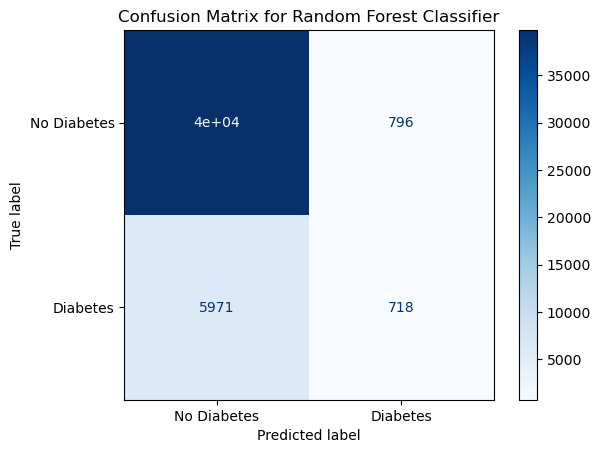

In [121]:
import seaborn as sns #for statistical graphics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #for displaying confusion matrix

#Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yTest, yPrediction), display_labels=['No Diabetes', 'Diabetes']).plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

> From the table we can see that the True Positives for No diabetes was significantly higher than all the other values. That could indicate some bias towards the presence of no diabetes as it was consistenly predicted correctly more than the other classes.

>The next visualization to look at is the classification report. This will show us the precision, recall, and f1-score of the classification. The precision measures how many of the predicted positive instances are actually positive. The recall measures how many of the actual positive instances were correctly predicted. The F1-score provides a balance between precision and recall. F1-score is useful when the class distribution is imbalanced. The heatmap which will be used to display this color-codes the values in each cell, making it easy to identify which classes perform well or poorly for each metric. Brighter colors indicate higher values.

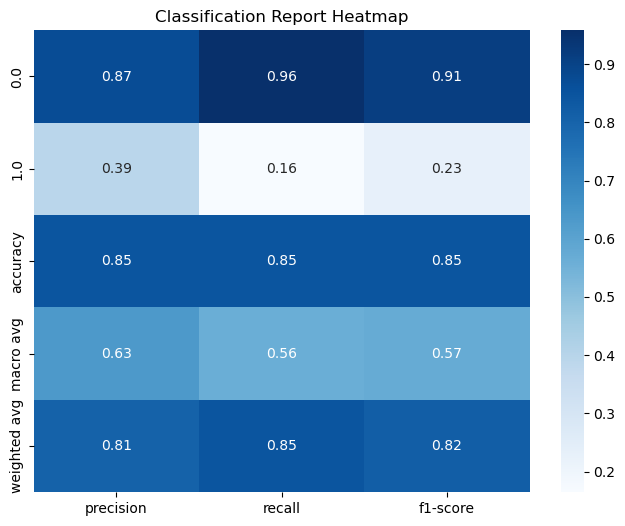

In [95]:
from sklearn.metrics import classification_report

# Visualize the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame.from_dict(classification_report(yTest, yPrediction, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

> From the classifcation report it is clear what was succesful and what was not. To understand what is going on the weighted avg, and macro avg can be ignored. The classification was extremely succesful as predicting the cases when diabetes was not present. The precison was 87%, the recall was 96%, and the f1-score was 91% showing there is a good trade off between precision and recall. On the other hand the classifcation was very poor at predicting the cases when diabetes was present. The precison was 39%, the recall was 16%, and the f1-score was 23% showing the model struggles to balance precision and recall. The model is not nearly as good at predicting when there is a presense of diabetes. 

> By using the confusion matrix and classification report together it can help assess and identify potential areas of improvement in this classification model. From the visualizations of the two it is clear there is work to do to improve the accuracy of the classification, specifically for correctly predicting the presence of diabetes when it is present. This is what was predicated after looking at the distribution of data. There is a clear bias towards predicting the absence of diabetes. This does make sense with how many more entries of the absence of diabetes there were compared to number entries with the presnece of diabetes 

### Sources
>CDC Diabetes Info <br>www.cdc.gov/diabetes/basics/diabetes.html#:~:text=With%20diabetes%2C%20your%20body%20doesn,vision%20loss%2C%20and%20kidney%20disease 

>Dataset <br> https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset

